# **Project Name**    - **Spam detection ml model**




##### **Contribution**    - Individual
##### **Team Member** -Lalit kumar harode


# **Project Summary -**

Spam emails have been a persistent nuisance in the digital world, inundating inboxes and posing cybersecurity threats. To combat this, a machine learning project was undertaken to develop an efficient spam detection system. This project aimed to create a model that could automatically identify and filter out spam emails from legitimate ones.

# **Problem Statement**


**I have given the dataset based on a spam detection and based on that i have to find insights and i have to make a model for predicting.**

# ***Let's Begin !***

## ***Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer # it converts the data into vectorizer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score,accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
spam_df=pd.read_csv('/content/drive/MyDrive/Coders cave internship/spam.csv')

### Dataset First View

In [4]:
# Dataset First Look
spam_df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
spam_df.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
row_count=len(spam_df)
column_count=len(spam_df.columns)
print(row_count)
print(column_count)

5572
2


In [7]:
# Another method for the rows and columns count
# Dataset Rows & Columns count
row_count=spam_df.shape[0]
column_count=spam_df.shape[1]
print(row_count)
print(column_count)

5572
2


### Dataset Information

In [8]:
# Dataset Info
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
duplicate_count=spam_df.duplicated().sum()
duplicate_count

415

In [10]:
spam_df[spam_df.duplicated()]

,Category,Message
103,ham,As per your request 'Melle Melle (Oru Minnamin...
154,ham,As per your request 'Melle Melle (Oru Minnamin...
207,ham,"As I entered my cabin my PA said, '' Happy B'd..."
223,ham,"Sorry, I'll call later"
326,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


**dropin dthe duplicates values**

In [11]:
spam_df=spam_df.drop_duplicates()
spam_df


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
update_duplicate_count=spam_df.duplicated().sum()
update_duplicate_count

0

#### Missing Values/Null Values

In [13]:
# Missing Values/Null Values Count
null_counts=spam_df.isnull().sum()
null_counts

Category    0
Message     0
dtype: int64

Text(0, 0.5, 'null_counts')

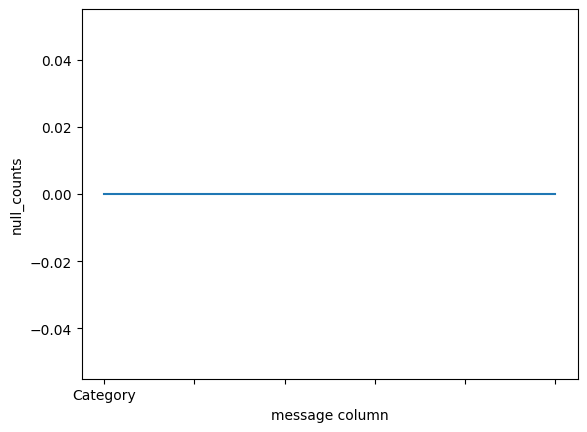

In [14]:
# Visualizing the missing values
null_counts.plot()
plt.xlabel('message column')
plt.ylabel('null_counts')

## ***Understanding Your Variables***

In [15]:
# Dataset Columns
spam_df_columns=spam_df.columns
spam_df_columns

Index(['Category', 'Message'], dtype='object')

In [16]:
# Dataset Describe
spam_df.describe()

,Category,Message
count,5157,5157
unique,2,5157
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


### Check Unique Values for each variable.

In [17]:
# Check Unique Values for each variable.
unique_values=spam_df.nunique()
unique_values

Category       2
Message     5157
dtype: int64

## ***Data Wrangling***

### Data Wrangling Code

In [18]:
# Write your code to make your dataset analysis ready.
spam_df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Category count**

In [19]:
category_count=spam_df['Category'].value_counts()
category_count

ham     4516
spam     641
Name: Category, dtype: int64

**Top words in message**

In [20]:
spam_df['Message'].str.split(' ',expand=True).stack().value_counts()[0:10]

to     1967
you    1561
I      1378
a      1200
the    1121
and     815
in      732
i       724
is      693
u       619
dtype: int64

most of the words are i found from the stopwords category

**Length of each message**

In [21]:
spam_df['message_len']=spam_df['Message'].str.len()
spam_df['message_len']

0       111
1        29
2       155
3        49
4        61
       ... 
5567    160
5568     36
5569     57
5570    125
5571     26
Name: message_len, Length: 5157, dtype: int64

## ***Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### **Category count**

In [22]:
spam_df['Category'].value_counts()

ham     4516
spam     641
Name: Category, dtype: int64

<Axes: xlabel='Category', ylabel='count'>

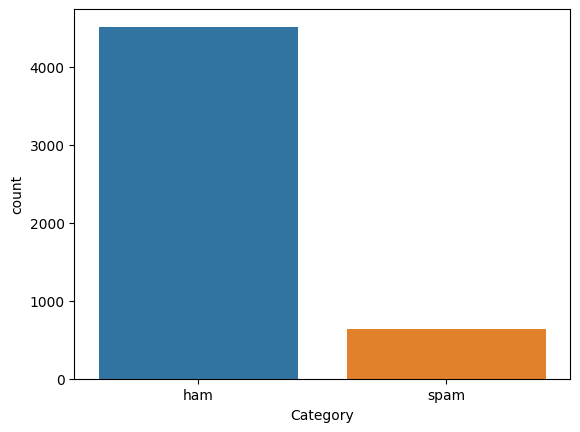

In [23]:
sns.countplot(x=spam_df['Category'])

#### **Top words that are repiting again and again**

<Axes: >

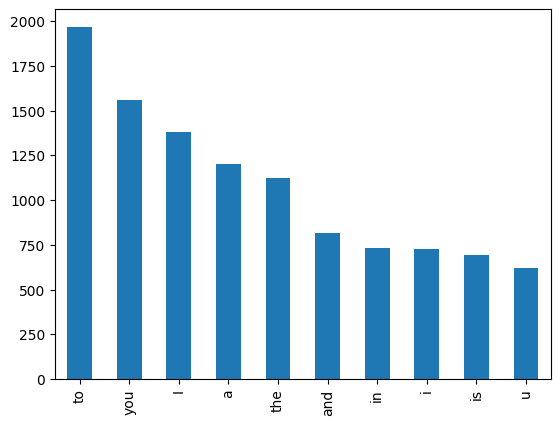

In [24]:
spam_df['Message'].str.split(' ',expand=True).stack().value_counts()[0:10].plot(kind='bar')

In [25]:
spam_df.head()

,Category,Message,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


#### **Visuvalising distribution of the length of a message**

<ipython-input-26-77a274fae7d5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(spam_df['message_len'])


<Axes: xlabel='message_len', ylabel='Density'>

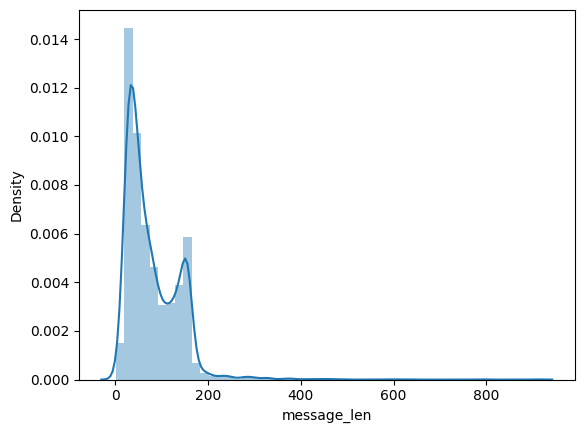

In [26]:
sns.distplot(spam_df['message_len'])

#### **distibution off a length of a message in spam data and ham dataset**

In [27]:
spam_spam_df=spam_df[spam_df['Category']=='spam']
spam_spam_df

,Category,Message,message_len
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147
8,spam,WINNER!! As a valued network customer you have...,157
9,spam,Had your mobile 11 months or more? U R entitle...,154
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136
...,...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...,160
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147


In [28]:
spam_ham_df=spam_df[spam_df['Category']=='ham']
spam_ham_df

,Category,Message,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
6,ham,Even my brother is not like to speak with me. ...,77
...,...,...,...
5565,ham,Huh y lei...,12
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


<ipython-input-29-02ea5d5fa50e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(spam_ham_df['message_len'],hist_kws={'alpha': 0.6, 'color': 'lightblue'}, label='Ham')
<ipython-input-29-02ea5d5fa50e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(spam_spam_df['message_len'],hist_kws={'alpha': 

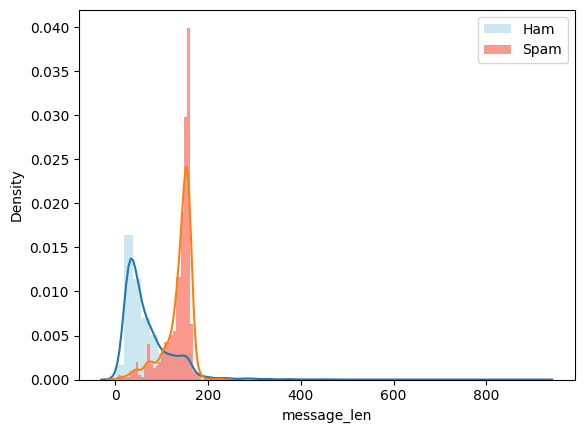

In [29]:
sns.distplot(spam_ham_df['message_len'],hist_kws={'alpha': 0.6, 'color': 'lightblue'}, label='Ham')
sns.distplot(spam_spam_df['message_len'],hist_kws={'alpha': 0.8, 'color': 'salmon'}, label='Spam')
plt.legend()

#### **Visuvalizing the statistical properties of a length of a message**

<Axes: >

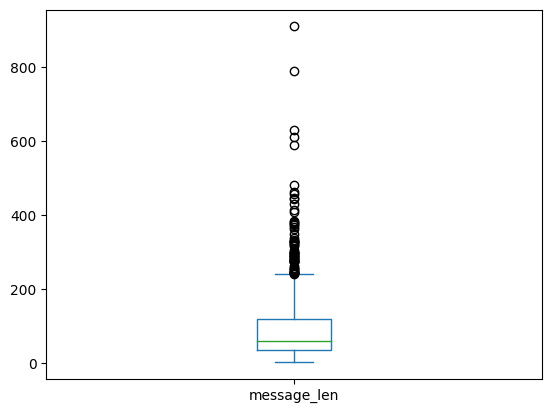

In [30]:
spam_df['message_len'].plot(kind='box')

#### **Visuvalising the statistical properties of a length of a message with respect to the spam and ham**

<Axes: title={'center': 'message_len'}, xlabel='Category'>

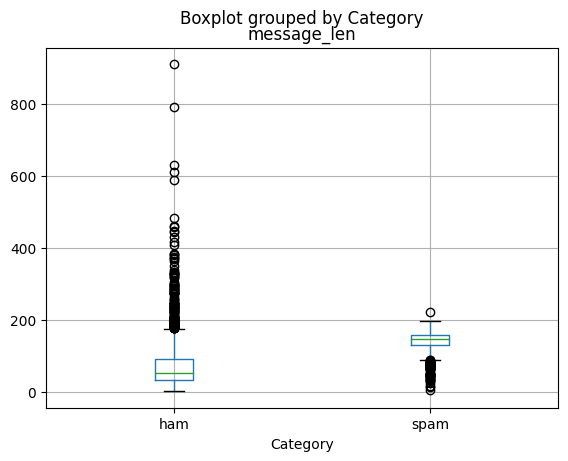

In [31]:
spam_df.boxplot(by='Category',column='message_len')

## ***Feature Engineering & Data Pre-processing***

###Handling Missing Values

In [32]:
# Handling Missing Values & Missing Value Imputation
spam_df.isnull().sum()

Category       0
Message        0
message_len    0
dtype: int64

**There is no null values present in our dataset**

###  Handling Outliers

**We don't have a numeric data so we don't need outlier treatment**

In [33]:
# Handling Outliers & Outlier treatments

### Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

####  Lower Casing

In [34]:
# Lower Casing
spam_df['Message']=spam_df['Message'].str.lower()
spam_df['Message']

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                 will ü b going to esplanade fr home?
5569    pity, * was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: Message, Length: 5157, dtype: object

####  Removing Punctuations

In [35]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [36]:

def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [37]:
spam_df['Message']=spam_df['Message'].apply(remove_punctuation)

In [38]:
spam_df['Message']

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in 2 a wkly comp to win fa cup fina...
3             u dun say so early hor u c already then say
4       nah i dont think he goes to usf he lives aroun...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                  will ü b going to esplanade fr home
5569    pity  was in mood for that soany other suggest...
5570    the guy did some bitching but i acted like id ...
5571                            rofl its true to its name
Name: Message, Length: 5157, dtype: object

In [39]:
spam_df['message_len']

0       111
1        29
2       155
3        49
4        61
       ... 
5567    160
5568     36
5569     57
5570    125
5571     26
Name: message_len, Length: 5157, dtype: int64

####  Removing Stopwords & Removing White spaces

**Remove Stopwords**

In [40]:
sw=np.array(stopwords.words('english'))
sw

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [41]:
def remove_stopwords(text):
  text=[word.lower() for word in text.split() if word.lower() not in sw]
  return " ".join(text)


In [42]:
spam_df['Message']=spam_df['Message'].apply(remove_stopwords)
spam_df['Message']

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4             nah dont think goes usf lives around though
                              ...                        
5567    2nd time tried 2 contact u u £750 pound prize ...
5568                          ü b going esplanade fr home
5569                          pity mood soany suggestions
5570    guy bitching acted like id interested buying s...
5571                                       rofl true name
Name: Message, Length: 5157, dtype: object

**see which words are occuring maximum after stopwords removal**

In [43]:
top_words_after_stopwords_remove=spam_df['Message'].str.split(' ',expand=True).stack().value_counts()[0:10]
top_words_after_stopwords_remove

u       1012
call     480
im       449
2        446
get      363
ur       321
go       271
dont     262
4        261
ltgt     254
dtype: int64

####  Stteming operation

In [44]:
# function to handle stemming operation
stemmer=SnowballStemmer('english')
def stemming(text):
  text=[stemmer.stem(word) for word in text.split()]
  return " ".join(text)

In [45]:
spam_df['Message']=spam_df['Message'].apply(stemming)
spam_df['Message']

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkts 2...
3                     u dun say earli hor u c alreadi say
4               nah dont think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u u £750 pound prize 2 ...
5568                              ü b go esplanad fr home
5569                              piti mood soani suggest
5570    guy bitch act like id interest buy someth els ...
5571                                       rofl true name
Name: Message, Length: 5157, dtype: object

In [46]:
top_words_after_stteming_remove=spam_df['Message'].str.split(' ',expand=True).stack().value_counts()[0:10]
top_words_after_stteming_remove

u       1012
call     546
im       450
2        446
go       436
get      424
ur       321
come     280
dont     262
4        261
dtype: int64

####  Text Vectorization

In [47]:
# Vectorizing Text
# Tokenization
vectorizer=CountVectorizer(max_df = 0.9,min_df = 10)
X=vectorizer.fit_transform(spam_df['Message'])

### Feature Manipulation & Selection

In [48]:
X=X.toarray()

In [49]:
X.shape

(5157, 780)

**justo to understand the updated matrix**

In [50]:
columns=vectorizer.get_feature_names_out()
columns

array(['08000839402', '08000930705', '10', '100', '1000', '10p', '12',
       '12hrs', '150', '150p', '150pmsg', '150ppm', '16', '18', '1st',
       '200', '2000', '2003', '250', '2nd', '500', '5000', '750', '800',
       '8007', '86688', '87066', 'abiola', 'abl', 'abt', 'account',
       'across', 'actual', 'ad', 'address', 'aft', 'afternoon', 'age',
       'ago', 'ah', 'aight', 'almost', 'alon', 'alreadi', 'alright',
       'also', 'alway', 'amp', 'angri', 'anoth', 'answer', 'anyon',
       'anyth', 'anytim', 'anyway', 'appli', 'ard', 'area', 'around',
       'asap', 'ask', 'ass', 'attempt', 'avail', 'await', 'award', 'away',
       'awesom', 'b4', 'babe', 'babi', 'back', 'bad', 'bank', 'bath',
       'beauti', 'bed', 'believ', 'best', 'better', 'big', 'bill',
       'birthday', 'bit', 'bonus', 'book', 'bore', 'bout', 'box', 'boy',
       'boytoy', 'break', 'bring', 'brother', 'bt', 'bus', 'busi', 'buy',
       'call', 'caller', 'camcord', 'came', 'camera', 'cancel', 'cant',
       '

In [51]:
spam_dataframe_updated=pd.DataFrame(X,columns=columns)
spam_dataframe_updated.head()

,08000839402,08000930705,10,100,1000,10p,12,12hrs,150,150p,...,yep,yes,yesterday,yet,yo,youll,your,youv,yr,yup
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###  Dimesionality Reduction

In [52]:
pca=PCA()
pca.fit_transform(X)


array([[ 2.28933862e-01, -1.99293156e-01, -1.41578099e-01, ...,
         5.23073560e-03,  2.17035880e-02,  2.66770096e-17],
       [ 1.21602217e-01, -1.49263215e-01, -1.21690857e-01, ...,
        -7.35071330e-04,  3.67952435e-03,  7.66048564e-17],
       [-5.13006119e-01,  2.02192306e-02,  6.35078106e-01, ...,
         1.14213688e-02, -1.34196278e-03,  2.02013263e-16],
       ...,
       [ 7.59675626e-02, -9.87626286e-02, -9.46932941e-02, ...,
         1.34203613e-04,  2.88679810e-04,  4.99898015e-18],
       [-1.74031269e-01,  4.58708927e-02,  3.19989318e-01, ...,
        -8.19733500e-03, -6.96786430e-03, -1.27254507e-16],
       [ 8.10812592e-02, -6.20365073e-02, -6.27688960e-02, ...,
        -2.18737331e-03, -4.39740081e-04,  6.15951709e-17]])

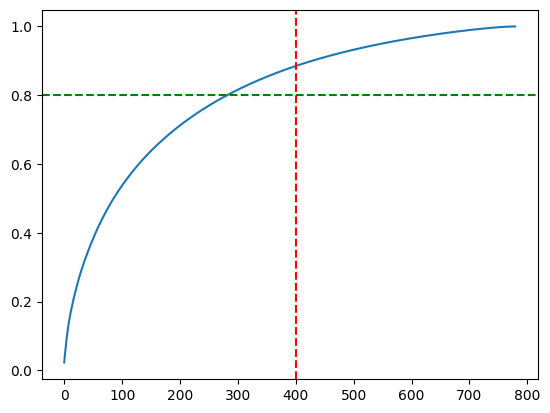

In [53]:
plt.plot(range(X.shape[1]),np.cumsum(pca.explained_variance_ratio_))
plt.axvline(x=400, color='red', linestyle='--')
plt.axhline(y=0.8, color='Green', linestyle='--')

# pca.explained_variance_ratio_

In [54]:
# reducing the dimensions to 3000 using pca
pca = PCA(n_components=400, random_state=42)
pca.fit(X)

PCA(n_components=400, random_state=42)

In [55]:
X=pca.transform(X)
X.shape

(5157, 400)

###  Data Splitting

In [56]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train,X_test,y_train,y_test=train_test_split(X,spam_df['Category'],test_size=0.2)

## ***ML Model Implementation***

###**Naive bayes model**

In [57]:
# ML Model - 1 Implementation
gausian_naive_bayes=GaussianNB()
gausian_naive_bayes.fit(X_train,y_train)


GaussianNB()

In [58]:
# predict for training data
y_pred_train=gausian_naive_bayes.predict(X_train)
# predict for testing data
y_pred_test=gausian_naive_bayes.predict(X_test)


The pos_label parameter is useful when you have a multi-class classification problem, and you want to specify which class should be considered as the positive class when calculating precision. For binary classification, you can omit it, and it will work with the default value of 1.

**on training data**

In [59]:
precision_score_naive=precision_score(y_pred_train,y_train,pos_label='spam')
recall_score_naive=recall_score(y_pred_train,y_train,pos_label='spam')
accuracy_score_naive=accuracy_score(y_pred_train,y_train)
classification_report_naive=classification_report(y_pred_train,y_train)
confusion_matrix_naive=confusion_matrix(y_pred_train,y_train)
print(precision_score_naive)
print(recall_score_naive)
print(accuracy_score_naive)
print(classification_report_naive)
print(confusion_matrix_naive)

0.8070175438596491
0.3686553873552983
0.8041212121212121
              precision    recall  f1-score   support

         ham       0.80      0.97      0.88      3002
        spam       0.81      0.37      0.51      1123

    accuracy                           0.80      4125
   macro avg       0.81      0.67      0.69      4125
weighted avg       0.80      0.80      0.78      4125

[[2903   99]
 [ 709  414]]


([<matplotlib.axis.YTick at 0x7875983bd810>,
 [Text(0, 0, 'no spam'), Text(0, 1, 'spam')])

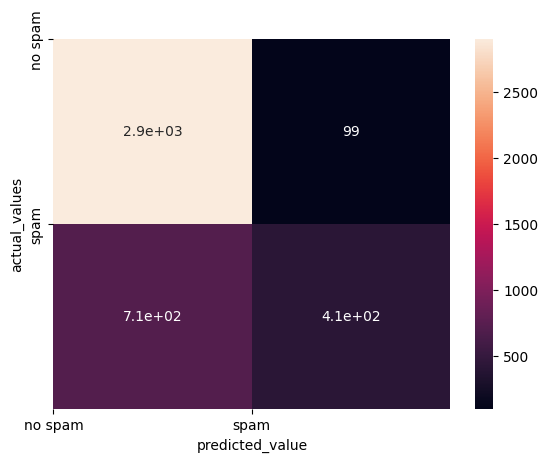

In [60]:
sns.heatmap(confusion_matrix_naive,annot=True)
plt.xlabel('predicted_value')
plt.ylabel('actual_values')
plt.xticks(ticks=[0,1],labels=['no spam','spam'])
plt.yticks(ticks=[0,1],labels=['no spam','spam'])

**on testing data**

In [61]:
precision_score_naive=precision_score(y_pred_test,y_test,pos_label='spam')
recall_score_naive=recall_score(y_pred_test,y_test,pos_label='spam')
accuracy_score_naive=accuracy_score(y_pred_test,y_test)
classification_report_naive=classification_report(y_pred_test,y_test)
confusion_matrix_naive=confusion_matrix(y_pred_test,y_test)
print(precision_score_naive)
print(recall_score_naive)
print(accuracy_score_naive)
print(classification_report_naive)
print(confusion_matrix_naive)

0.859375
0.3793103448275862
0.8081395348837209
              precision    recall  f1-score   support

         ham       0.80      0.98      0.88       742
        spam       0.86      0.38      0.53       290

    accuracy                           0.81      1032
   macro avg       0.83      0.68      0.70      1032
weighted avg       0.82      0.81      0.78      1032

[[724  18]
 [180 110]]


([<matplotlib.axis.YTick at 0x787596381870>,
 [Text(0, 0, 'no spam'), Text(0, 1, 'spam')])

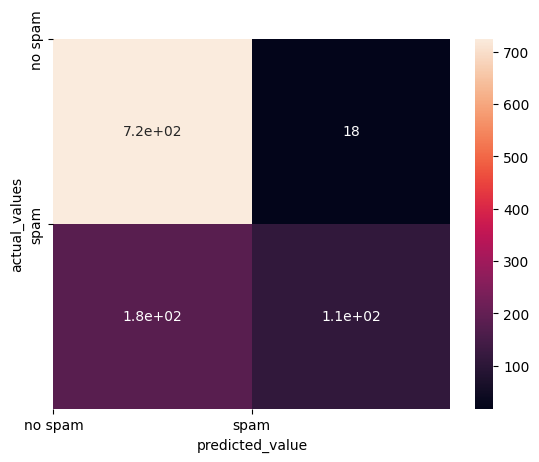

In [62]:
sns.heatmap(confusion_matrix_naive,annot=True)
plt.xlabel('predicted_value')
plt.ylabel('actual_values')
plt.xticks(ticks=[0,1],labels=['no spam','spam'])
plt.yticks(ticks=[0,1],labels=['no spam','spam'])

### **Support Vector Machine**

In [63]:
support_vector_machine=SVC(kernel='rbf',C=100)
support_vector_machine.fit(X_train,y_train)

SVC(C=100)

In [64]:
# predict for training data
y_pred_train_svm=support_vector_machine.predict(X_train)
# predict for testing data
y_pred_test_svm=support_vector_machine.predict(X_test)


**on training data**

In [65]:
precision_score_svm=precision_score(y_pred_train_svm,y_train,pos_label='spam')
recall_score_svm=recall_score(y_pred_train_svm,y_train,pos_label='spam')
accuracy_score_svm=accuracy_score(y_pred_train_svm,y_train)
classification_report_svm=classification_report(y_pred_train_svm,y_train)
confusion_matrix_svm=confusion_matrix(y_pred_train_svm,y_train)
print(precision_score_naive)
print(recall_score_naive)
print(accuracy_score_naive)
print(classification_report_svm)
print(confusion_matrix_svm)

0.859375
0.3793103448275862
0.8081395348837209
              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      3617
        spam       0.99      1.00      1.00       508

    accuracy                           1.00      4125
   macro avg       1.00      1.00      1.00      4125
weighted avg       1.00      1.00      1.00      4125

[[3612    5]
 [   0  508]]


([<matplotlib.axis.YTick at 0x7875963ef280>,
 [Text(0, 0, 'no spam'), Text(0, 1, 'spam')])

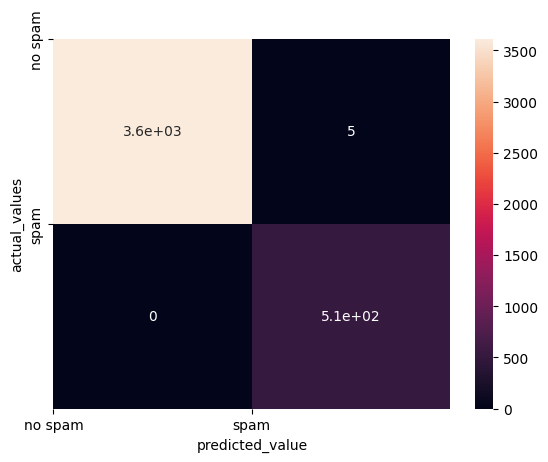

In [66]:
sns.heatmap(confusion_matrix_svm,annot=True)
plt.xlabel('predicted_value')
plt.ylabel('actual_values')
plt.xticks(ticks=[0,1],labels=['no spam','spam'])
plt.yticks(ticks=[0,1],labels=['no spam','spam'])

**on testing data**

In [67]:
precision_score_svm=precision_score(y_pred_test_svm,y_test,pos_label='spam')
recall_score_svm=recall_score(y_pred_test_svm,y_test,pos_label='spam')
accuracy_score_svm=accuracy_score(y_pred_test_svm,y_test)
classification_report_svm=classification_report(y_pred_test_svm,y_test)
confusion_matrix_svm=confusion_matrix(y_pred_test_svm,y_test)
print(precision_score_naive)
print(recall_score_naive)
print(accuracy_score_naive)
print(classification_report_svm)
print(confusion_matrix_svm)

0.859375
0.3793103448275862
0.8081395348837209
              precision    recall  f1-score   support

         ham       1.00      0.97      0.98       924
        spam       0.81      0.96      0.88       108

    accuracy                           0.97      1032
   macro avg       0.90      0.97      0.93      1032
weighted avg       0.98      0.97      0.97      1032

[[900  24]
 [  4 104]]


([<matplotlib.axis.YTick at 0x78759d0a7670>,
 [Text(0, 0, 'no spam'), Text(0, 1, 'spam')])

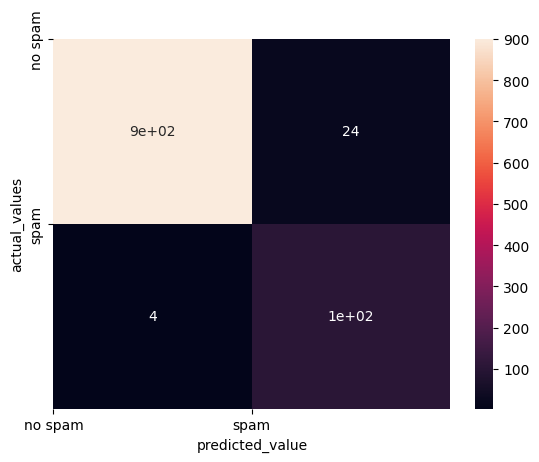

In [68]:
sns.heatmap(confusion_matrix_svm,annot=True)
plt.xlabel('predicted_value')
plt.ylabel('actual_values')
plt.xticks(ticks=[0,1],labels=['no spam','spam'])
plt.yticks(ticks=[0,1],labels=['no spam','spam'])

# **Conclusion**

From the above spam dataset i found some important insights from the visuvalization like ham type messages are more as compared to spma messages and alsso i found some repiting words and also from visuvalization i get the message length distribution and also its statistical properties with spam and ham messagee. in the Machine learningt implimantation i applied a naive bayes and support vector machine algorithm on the dataset after applying successively train_test_split.